## 1.Kaggle 또는 Google TensorFlow : 신용카드 사기 탐지 데이터셋

코드 설명

In [ ]:
# 데이터 로드 및 기본 정보 출력:

# Kaggle 또는 Google TensorFlow에서 제공하는 신용카드 사기 탐지 데이터셋을 로드합니다.
# head()는 처음 5개의 샘플을 출력합니다.
# describe()는 각 열의 기본 통계 정보를 제공합니다 (평균, 표준편차, 최솟값, 최댓값 등).
# info()는 각 열의 데이터 타입과 결측값 여부를 확인할 수 있습니다.

# 결측값 확인:
# isnull().sum()을 사용하여 각 열의 결측값 개수를 확인합니다.

# 클래스 비율 확인:
# value_counts()를 사용해 클래스(정상 거래와 사기 거래)의 분포를 출력하고, normalize=True 옵션으로 비율(%)도 계산합니다.

# 시각화:
# countplot()을 사용해 클래스 분포를 시각화합니다.
# histplot()을 사용해 거래 금액(Amount)과 거래 시간(Time)의 분포를 시각화합니다.
# heatmap()을 사용해 상관 관계 히트맵을 시각화하여, 특성 간의 상관 관계를 파악합니다.

데이터셋 기본 구조:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V2

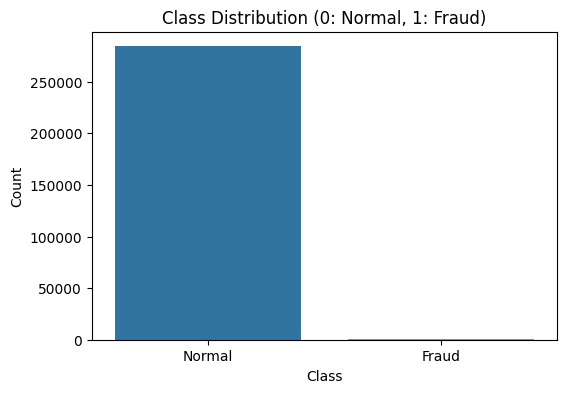

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


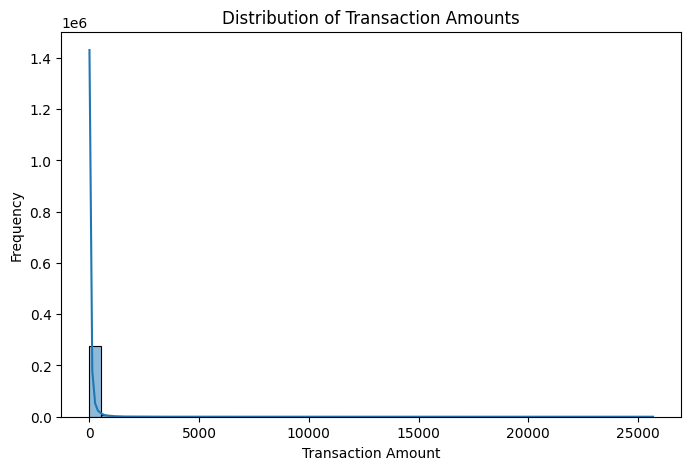

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


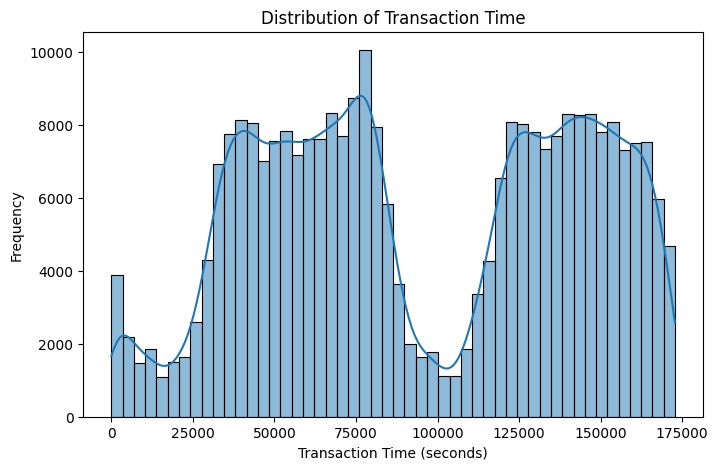

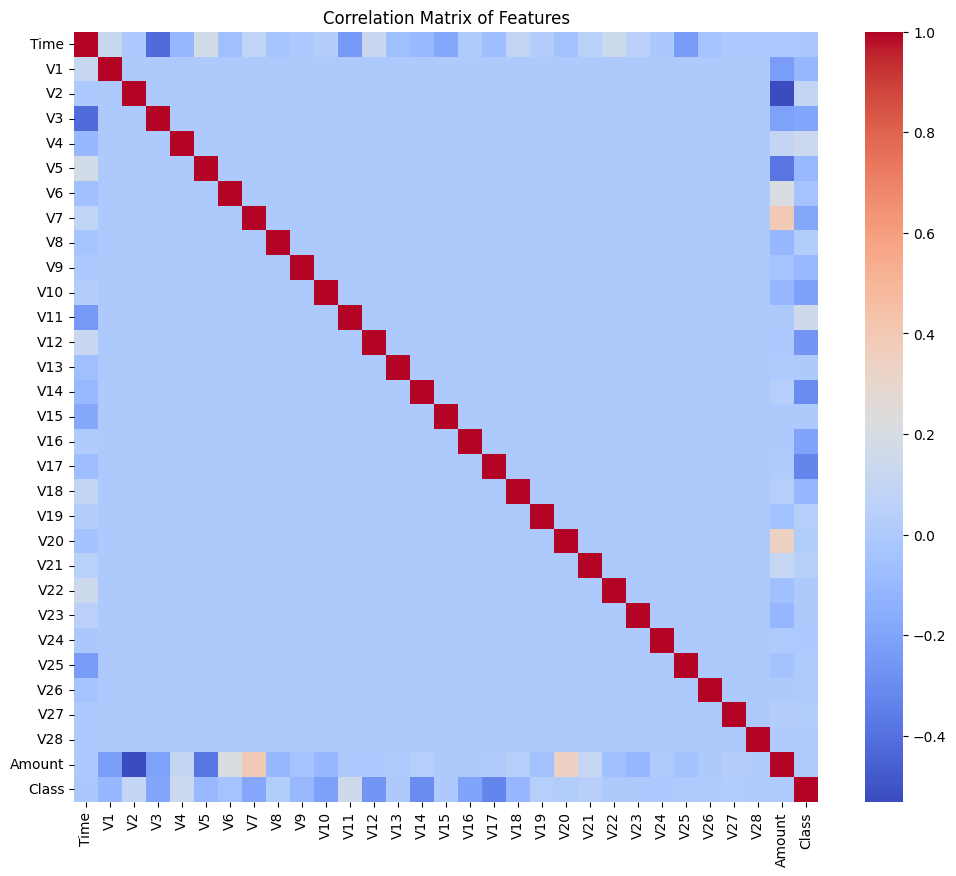

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# 2. 데이터셋 기본 정보 출력
print("데이터셋 기본 구조:")
print(df.head())  # 처음 5개의 행 출력

print("\n데이터셋 기본 통계 요약:")
print(df.describe())  # 기본 통계 요약 (평균, 표준편차, 최솟값, 최댓값 등)

print("\n데이터셋 정보:")
print(df.info())  # 데이터 타입, 결측값 확인

# 3. 결측값 확인
print("\n결측값 개수:")
print(df.isnull().sum())

# 4. 클래스 비율 확인
print("\n클래스 분포:")
print(df["Class"].value_counts())
print("\n클래스 비율 (%):")
print(df["Class"].value_counts(normalize=True) * 100)

# 5. 클래스 분포 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0: Normal, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["Normal", "Fraud"])
plt.show()

# 6. 거래 금액 (Amount) 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(df["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# 7. 거래 시간 (Time) 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(df["Time"], bins=50, kde=True)
plt.title("Distribution of Transaction Time")
plt.xlabel("Transaction Time (seconds)")
plt.ylabel("Frequency")
plt.show()

# 8. 상관 관계 히트맵
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Features")
plt.show()


결과 해석

In [ ]:
데이터셋 탐색:
약 28만 개의 거래 데이터가 있으며, 대부분의 거래는 정상(0)이고, 사기(1) 거래는 매우 적습니다.
    
불균형 데이터로, 사기 거래는 전체 거래의 약 0.17만 차지합니다.
    
거래 금액 및 시간 분포:

거래 금액(Amount)의 분포는 대부분이 낮은 금액에 집중되어 있습니다.
    
거래 시간(Time)의 분포는 고르게 분포되어 있습니다.

상관 관계 분석:

상관 관계 히트맵에서, 대부분의 특성(V1부터 V28)은 비식별화된 특성이기 때문에 직접적인 해석이 어렵습니다.
    
특성 간의 상관 관계가 낮은 편이지만, 일부 특성은 강한 상관 관계를 보일 수 있습니다.

## 2. pandas : 타이타닉 데이터셋

코드 설명

In [ ]:
# 데이터 로드:
# Pandas를 사용하여 타이타닉 데이터를 로드합니다. 데이터는 GitHub의 공개 URL에서 불러옵니다.

# 데이터셋 상위 5개 행 출력:
# head() 메서드를 사용하여 상위 5개 샘플을 출력합니다. 이를 통해 데이터 구조를 확인할 수 있습니다.

# 기본 정보 출력 (info()):
# info() 메서드는 데이터셋의 행과 열의 개수, 각 열의 데이터 타입, 그리고 결측값 여부를 보여줍니다.

#     통계 요약 (describe()):
# describe() 메서드는 수치형 변수의 기본적인 통계 정보를 출력합니다 (평균, 표준편차, 최소값, 최대값 등).

# 결측치 확인:
# isnull().sum() 메서드를 사용하여 각 열의 결측치 개수를 출력합니다.

#     고유값 개수 확인:
# nunique() 메서드는 각 열의 고유값 개수를 반환합니다. 이를 통해 범주형 변수의 고유값 수를 확인할 수 있습니다.

#     열 이름 출력:
# columns 속성을 사용하여 데이터셋의 열 이름을 출력합니다.

#     타겟 변수 (Survived) 분포 확인:
# value_counts() 메서드를 사용하여 생존 여부(0: 사망, 1: 생존)의 분포를 출력합니다.

In [2]:
import pandas as pd

# 1. 타이타닉 데이터셋 로드
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2. 데이터셋의 상위 5개 행 출력
print("데이터셋 상위 5개 행:")
print(df.head())

# 3. 데이터셋의 기본 정보 출력
print("\n데이터셋 기본 정보:")
print(df.info())

# 4. 데이터셋의 통계 요약
print("\n데이터셋 통계 요약:")
print(df.describe())

# 5. 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())

# 6. 각 열의 고유값 개수
print("\n각 열의 고유값 개수:")
print(df.nunique())

# 7. 데이터셋의 열 이름 출력
print("\n열 이름:")
print(df.columns)

# 8. 타겟 변수 분포 (Survived)
print("\n타겟 변수 (Survived) 분포:")
print(df["Survived"].value_counts())


데이터셋 상위 5개 행:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

결론

타이타닉 데이터셋에는 891개 샘플과 12개 열이 있습니다.
    
결측값이 많은 열은 Age와 Cabin입니다.
    
타겟 변수 (Survived)는 0과 1로 구성되며, 사망자가 더 많습니다 (0: 549명, 1: 342명)

# 3. Iris Dataset

데이터셋 설명

특성 (Features):

sepal length (꽃받침 길이, cm)
sepal width (꽃받침 너비, cm)
petal length (꽃잎 길이, cm)
petal width (꽃잎 너비, cm)

타겟 (Target):
0: Setosa
1: Versicolor
2: Virginica

In [ ]:
# 코드 설명
# 데이터셋 로드:
# load_iris() 함수로 붓꽃 데이터셋을 로드합니다.
# DataFrame으로 변환:
# 데이터를 더 쉽게 탐색할 수 있도록 Pandas DataFrame으로 변환합니다.
# 기본 정보 출력:
# head(): 데이터의 첫 5행을 출력합니다.
# info(): 각 열의 데이터 타입과 결측값 여부를 출력합니다.
# describe(): 데이터의 기본 통계량 (평균, 표준편차, 최소/최대값 등)을 출력합니다.
# 클래스 분포:
# value_counts(): 각 클래스(0, 1, 2)의 샘플 수를 출력합니다.
# 클래스 이름 출력:
# target_names: 클래스 이름을 출력합니다

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

# 1. 붓꽃 데이터셋 로드
iris = load_iris()

# 2. 데이터셋을 DataFrame으로 변환
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 3. 기본 정보 출력
print("데이터셋 샘플:\n", df.head())
print("\n데이터셋 기본 정보:")
print(df.info())
print("\n기술 통계 정보:\n", df.describe())

# 4. 클래스 분포 출력
print("\n클래스 분포:")
print(df['target'].value_counts())

# 5. 각 클래스 이름 출력
target_names = iris.target_names
print("\n클래스 이름:", target_names)


데이터셋 샘플:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

데이터셋 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null  

# 4. Kaggle : Loan Prediction Dataset(대출 승인 여부 예측) 

고객의 인구통계 정보와 대출 관련 정보를 포함하고 있으며, 이를 통해 머신러닝 모델을 사용하여 대출 승인을 예측할 수 있습니다.
Loan Prediction Dataset 주요 컬럼

Loan_ID: 대출 ID

Gender: 성별 (Male/Female)

Married: 결혼 여부 (Yes/No)

Dependents: 부양가족 수 (0, 1, 2, 3+)

Education: 교육 수준 (Graduate/Not Graduate)

Self_Employed: 자영업 여부 (Yes/No)

ApplicantIncome: 신청자의 소득

CoapplicantIncome: 공동 신청자의 소득

LoanAmount: 대출 금액

Loan_Amount_Term: 대출 상환 기간 (개월 수)

Credit_History: 신용 기록 (1: 신용 있음, 0: 신용 없음)

Property_Area: 부동산 위치 (Rural, Semiurban, Urban)

Loan_Status: 대출 승인 여부 (Y: 승인, N: 거절) - 타겟 변수

#### https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

# 5. kaggle : 보험 사기 데이터셋 (Insurance Fraud Dataset)

In [ ]:
설명:
이 데이터셋은 보험 청구 내역에서 사기 여부를 탐지하는 데 사용됩니다.
청구 금액, 사고 유형, 고객 정보 등의 특성이 포함됩니다.
분석 목표:
보험 청구가 사기일 가능성을 예측하고, 사기 방지 시스템을 구축합니다.


보험 사기 데이터셋 주요 정보
데이터셋 설명

이 데이터셋은 다양한 보험 청구 데이터를 포함하며, 각 청구 건이 사기인지 아닌지를 나타냅니다.

주요 분석 목표는 사기 청구 탐지로, 머신러닝 모델을 통해 사기 청구를 자동으로 식별할 수 있습니다.

주요 컬럼 설명

policyID: 보험 정책 ID

statecode: 사고가 발생한 주의 코드

county: 사고가 발생한 카운티

eq_site_limit: 보험 적용 한도 (건물 피해)
hu_site_limit: 보험 적용 한도 (폭풍 피해)
fl_site_limit: 보험 적용 한도 (홍수 피해)
fr_site_limit: 보험 적용 한도 (화재 피해)
tiv_2011: 2011년 총 보험 가치
tiv_2012: 2012년 총 보험 가치
eq_site_deductible: 건물 피해 공제액
hu_site_deductible: 폭풍 피해 공제액
fl_site_deductible: 홍수 피해 공제액
fr_site_deductible: 화재 피해 공제액
point_latitude: 사고 발생 위치의 위도
point_longitude: 사고 발생 위치의 경도
fraud_reported: 사기 여부 (Y: 사기, N: 정상)

분석 목표

사기 청구 탐지: fraud_reported 컬럼을 예측하기 위한 머신러닝 모델 개발.

위험 평가: 특정 지역이나 조건에서 사기 청구의 빈도와 위험을 분석.

#### https://www.kaggle.com/code/buntyshah/insurance-fraud-claims-detection

# 6. UCI Machine Learning Repository : 은행 마케팅 데이터셋 (Bank Marketing Dataset)

이 데이터셋은 은행 마케팅 캠페인의 데이터를 포함하며, 고객이 특정 금융 상품에 가입할 가능성을 예측하는 데 사용됩니다.
    
전화 접촉 정보, 직업, 나이, 교육 수준, 이전 캠페인 결과 등의 특성이 포함됩니다.
    
분석 목표:
고객이 금융 상품에 가입할 가능성을 예측하고, 효과적인 마케팅 전략을 수립합니다.

### https://archive.ics.uci.edu/dataset/222/bank+marketing

In [ ]:
은행 마케팅 데이터셋 (Bank Marketing Dataset)**은 포르투갈의 한 은행에서 전화 마케팅 캠페인을 통해 고객이 정기 예금 (term deposit)에 가입했는지 여부를 나타내는 데이터입니다. 이 데이터셋은 고객의 인구통계 정보, 계좌 정보, 캠페인 관련 정보 등을 포함하고 있으며, 이진 분류 문제로 많이 사용됩니다.

1. 데이터셋 설명
데이터셋 이름: Bank Marketing Dataset
출처: UCI Machine Learning Repository - Bank Marketing Dataset
샘플 수: 45,211개
특성 수: 17개 (16개의 입력 특성, 1개의 타겟 변수)
목표: 전화 마케팅 캠페인이 성공적으로 고객이 정기 예금에 가입했는지 (yes 또는 no) 예측합니다.
2. 주요 컬럼 설명
컬럼명	설명
age	고객의 나이
job	직업 (예: 'admin.', 'technician', 'blue-collar')
marital	결혼 여부 (예: 'married', 'single', 'divorced')
education	교육 수준 (예: 'primary', 'secondary', 'tertiary')
default	신용 불이행 여부 (예: 'yes', 'no')
balance	은행 계좌 잔고 (유로화)
housing	주택 대출 여부 (예: 'yes', 'no')
loan	개인 대출 여부 (예: 'yes', 'no')
contact	연락 방식 (예: 'cellular', 'telephone')
day	마지막 연락일 (1에서 31 사이의 값)
month	마지막 연락 월 (예: 'jan', 'feb', 'mar')
duration	마지막 연락의 지속 시간 (초)
campaign	이번 캠페인에서 연락한 횟수
pdays	이전 캠페인에서 마지막 연락 후 지난 일수 (999: 연락 없음)
previous	이전 캠페인에서 연락한 횟수
poutcome	이전 캠페인의 결과 (예: 'success', 'failure')
y (target)	타겟 변수: 고객이 정기 예금에 가입했는지 여부 ('yes', 'no')